# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [3]:
# Importer resten av pakkene du trenger her:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np  
from sklearn.model_selection import train_test_split, cross_val_predict, RepeatedKFold
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

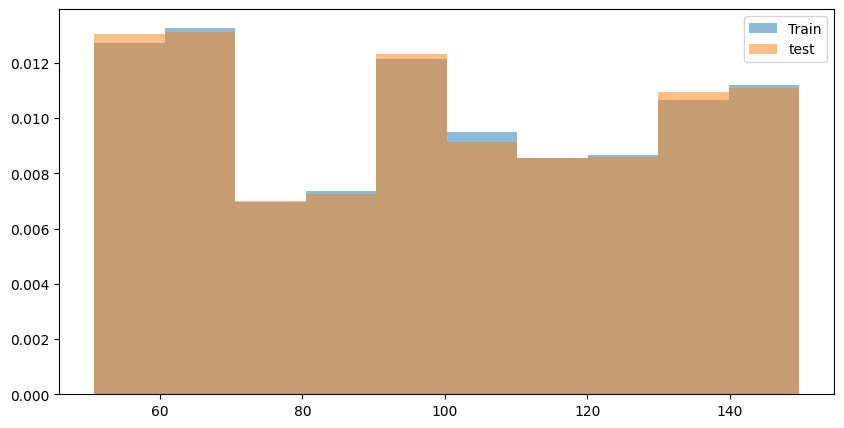

In [6]:
#TODO: visualiser y_train og y_test i et histogramb
plt.figure(figsize = (10,5))
plt.hist(y_train, density = True, alpha = 0.5, label = "Train")
#plt.hist(y_val, density = True, alpha = 0.5 ,label = "val")
plt.hist(y_test, density = True, alpha = 0.5, label = "test")
plt.legend()
plt.show()

**Svar:**

*< Basert på histogrammet er det en regresjonsoppgave. Det er fordi x-aksen viser kontinuerlige verdier, ikke diskrete klasseverdier 0 og 1.  >*
*< regresjonsmodeller predikerer kontinuerlige utfall,  mens klassifisering predikere diskrete klasser>*


#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [9]:
def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    #TODO: Fullfør koden
    plt.figure(figsize = (10,10))
    sns.heatmap(X_temp.corr(), annot = True)
    sns.heatmap(y_temp.corr(), annot = True)
    plt.show()
    ...

TypeError: Series.corr() missing 1 required positional argument: 'other'

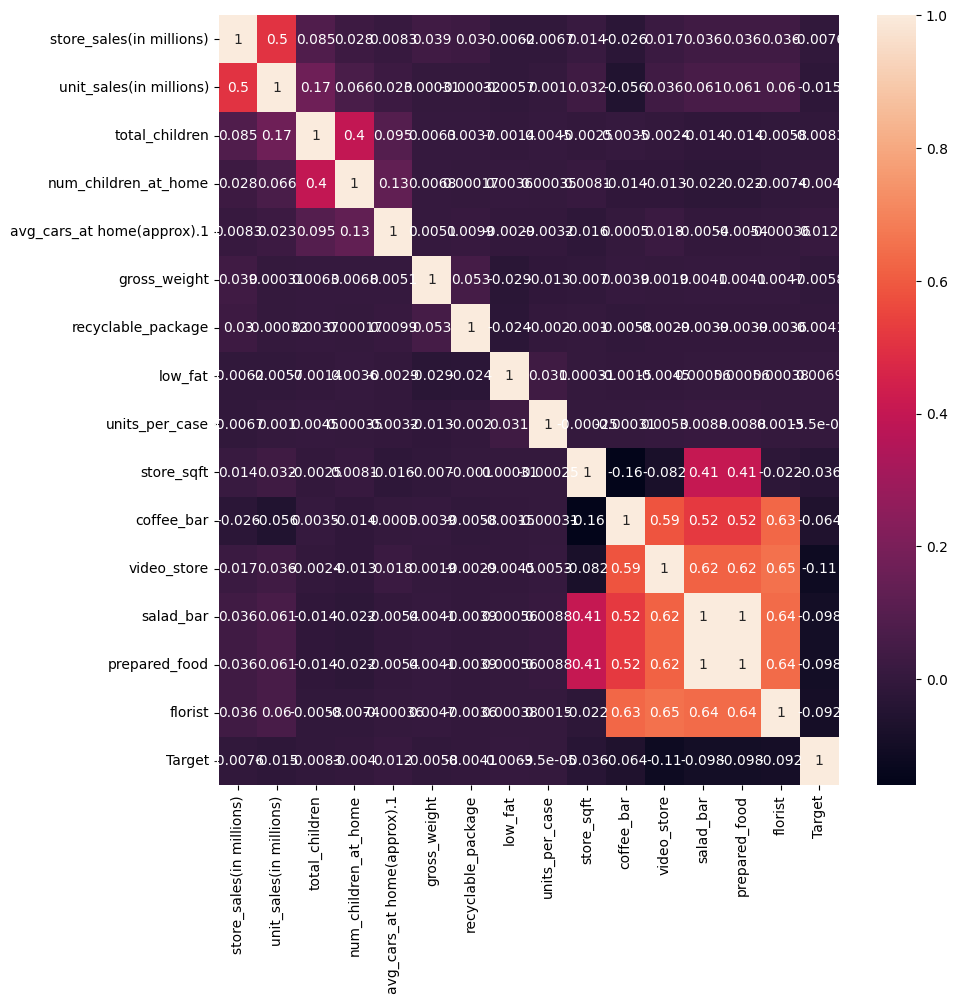

In [10]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

*< korrelasjonsverdiene varierer fra 1 til -1, hvor 1 indikserer positiv korrelasjon, 0 indikerer ingen korrelasjon, og -1 indikerer negativ korrelasjon. basert på korrelasjonsmatrisen, den som har høyest korrelasjon med "target" er Florist med en verdi 0.65, deretter er det "prepared_food" har en korrelasjonsverdi på 0.64, og siste er det "salad_bar" har en korrelasjon på 0.62 >*

Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [ ]:

X.head()

In [ ]:

y.head()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [ ]:
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [10, 20],
    'min_samples_split':[2,5]
}


In [ ]:
kf = KFold(n_splits = 3, shuffle = True, random_state= 42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, error_score ="raise")

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Beste parametre: {best_params}")
print(f"Beste score: {best_score}")


In [ ]:
#konvertering av negativ verdi til positiv verdi. 
best_score = -grid_search.best_score_
print(f"Best Score (MSE): {best_score}")


**Svar:**

*< Verdien jeg har fått er negativ. Når vi bruker "neg_mean_squared_error" får vi resulater i form av negativ MSE. Dette er fordi GridSearchCV i scikit-learn maksimerer skåren, også konverterer MSE til negativ verdi for å kunne bruke som en scorer. resultatet betyr at den beste gjennomsnittlig feilen fra cross validation er 851.55. I tillegg representerer det om hvor godt det beste modellen kan gjøre med hensyn til å minimere feilene i prediksjonene   >*

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [ ]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
best_params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
model = RandomForestRegressor(random_state = 42, **best_params)

In [ ]:
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
rkf_mae_scores, rkf_mse_scores= [],[]
for train_index, val_index in rkf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_val_cv)
    mae = mean_absolute_error(y_val_cv, y_pred_cv) 
    mse = mean_squared_error(y_val_cv, y_pred_cv)

    rkf_mae_scores.append(mae)
    rkf_mse_scores.append(mse)
    print(f"mean absolute error: {mae :.3f}")
    print(f"mean squared error: {mse:.3f}")

In [ ]:

mean_actuacl_price = y_train.mean()
relative_error_kf = mean_mae_rkf / mean_actual_price
relative_error_rkf = mean_mae_rkf / mean_actual_price
print(f"Gjennomsnittlig relativ feil (KFold MAE / gjennomsnittlig faktisk pris): {relative_error_kf:.3f}")
print(f"Gjennomsnittlig relativ feil (RepeatedKFold MAE / gjennomsnittlig faktisk pris): {relative_error_rkf:.3f}")
print(f"Gjennomsnittlig faktisk pris i treningsdataene: {mean_actual_price:.3f}")

**Svar:**

*<gjennomsnitlig MAE (25.525). dette er gjennomsnittlig feilen i modellens prediksjoner. lav feil betyr at modellen gjør små feil i sine prediksjoner.

>*

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [ ]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene
# Beste hyperparametere fra forrige oppgave
best_params = {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
model = RandomForestRegressor(random_state=42, **best_params)

model.fit(X_train, y_train)


In [ ]:
#prediksjon
y_pred = model.predict(X_test)
# Beregn MAE og MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


In [ ]:

mean_actual_price = y_test.mean()
relative_error = mae / mean_actual_price
print(f"Gjennomsnittlig relativ feil (MAE / gjennomsnittlig faktisk pris): {relative_error:.3f}")
print(f"Gjennomsnittlig faktisk pris i testdataene: {mean_actual_price:.3f}")

**Svar:**

*< ditt tekstsvar her >*